# CNN Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
import yfinance as yf

ticker_symbol = 'NEE'

nee_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(nee_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2013-01-02  17.497499  17.642500  17.452499  17.629999  13.064059  8953200
2013-01-03  17.650000  17.707500  17.582500  17.632500  13.065911  4909200
2013-01-04  17.660000  17.737499  17.612499  17.719999  13.130745  3739200
2013-01-07  17.712500  17.735001  17.594999  17.637501  13.069619  5578400
2013-01-08  17.645000  17.825001  17.597500  17.825001  13.208551  7972400


In [3]:
nee_data.reset_index(inplace=True)

print(nee_data.head())

        Date       Open       High        Low      Close  Adj Close   Volume
0 2013-01-02  17.497499  17.642500  17.452499  17.629999  13.064059  8953200
1 2013-01-03  17.650000  17.707500  17.582500  17.632500  13.065911  4909200
2 2013-01-04  17.660000  17.737499  17.612499  17.719999  13.130745  3739200
3 2013-01-07  17.712500  17.735001  17.594999  17.637501  13.069619  5578400
4 2013-01-08  17.645000  17.825001  17.597500  17.825001  13.208551  7972400


In [4]:
nee_data['Date'] = pd.to_datetime(nee_data['Date'])
nee_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.497499,17.642500,17.452499,17.629999,13.064059,8953200
1,2013-01-03,17.650000,17.707500,17.582500,17.632500,13.065911,4909200
2,2013-01-04,17.660000,17.737499,17.612499,17.719999,13.130745,3739200
3,2013-01-07,17.712500,17.735001,17.594999,17.637501,13.069619,5578400
4,2013-01-08,17.645000,17.825001,17.597500,17.825001,13.208551,7972400
...,...,...,...,...,...,...,...
2513,2022-12-23,83.000000,84.269997,83.000000,84.169998,81.116180,3254700
2514,2022-12-27,84.099998,84.279999,83.470001,84.000000,80.952347,4726500
2515,2022-12-28,84.199997,84.540001,82.980003,83.160004,80.142830,3536400
2516,2022-12-29,83.730003,84.690002,83.489998,84.080002,81.029457,3378300


In [5]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
nee_merged = pd.merge(date_range_df, nee_data, on='Date', how='left')
nee_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,17.497499,17.642500,17.452499,17.629999,13.064059,8953200.0
2,2013-01-03,17.650000,17.707500,17.582500,17.632500,13.065911,4909200.0
3,2013-01-04,17.660000,17.737499,17.612499,17.719999,13.130745,3739200.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,84.199997,84.540001,82.980003,83.160004,80.142830,3536400.0
3649,2022-12-29,83.730003,84.690002,83.489998,84.080002,81.029457,3378300.0
3650,2022-12-30,83.949997,84.019997,82.480003,83.599998,80.566872,4266900.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    nee_merged[metric].interpolate(method='linear', inplace=True)

nee_merged.bfill(inplace=True)
nee_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,17.497499,17.642500,17.452499,17.629999,13.064059,8.953200e+06
1,2013-01-02,17.497499,17.642500,17.452499,17.629999,13.064059,8.953200e+06
2,2013-01-03,17.650000,17.707500,17.582500,17.632500,13.065911,4.909200e+06
3,2013-01-04,17.660000,17.737499,17.612499,17.719999,13.130745,3.739200e+06
4,2013-01-05,17.677500,17.736666,17.606666,17.692500,13.110370,4.352267e+06
...,...,...,...,...,...,...,...
3648,2022-12-28,84.199997,84.540001,82.980003,83.160004,80.142830,3.536400e+06
3649,2022-12-29,83.730003,84.690002,83.489998,84.080002,81.029457,3.378300e+06
3650,2022-12-30,83.949997,84.019997,82.480003,83.599998,80.566872,4.266900e+06
3651,2022-12-31,83.949997,84.019997,82.480003,83.599998,80.566872,4.266900e+06


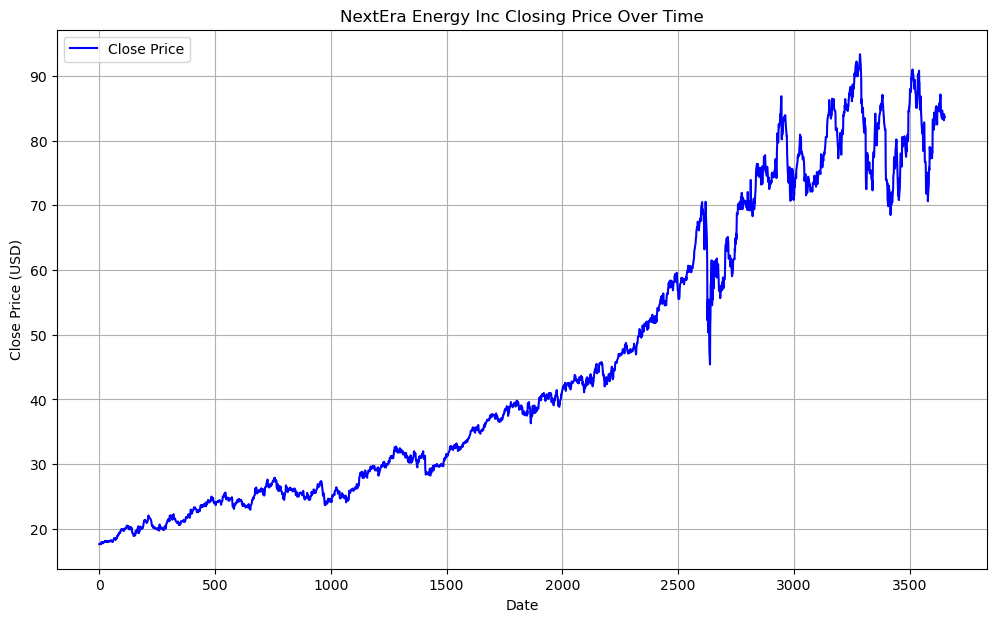

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(nee_merged['Close'], label='Close Price', color='blue')
plt.title('NextEra Energy Inc Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = nee_merged[['Close']].values

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 1)
(365, 10, 1)
(3278, 1)
(365, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), padding='same'))
model.add(MaxPooling1D(pool_size=1, padding='same'))
# Flatten the convolution output to feed it into a dense layer
model.add(Flatten())
# Output layer
model.add(Dense(units=1))   # Assuming a regression problem

model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mean_absolute_error'])

# Print the model summary to review its architecture
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             321 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 1s - 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0684 - val_loss: 0.0039 - val_mean_absolute_error: 0.0545
Epoch 2/50
47/47 - 0s - 2ms/step - loss: 1.9857e-04 - mean_absolute_error: 0.0087 - val_loss: 4.2332e-04 - val_mean_absolute_error: 0.0167
Epoch 3/50
47/47 - 0s - 2ms/step - loss: 1.6326e-04 - mean_absolute_error: 0.0070 - val_loss: 4.1697e-04 - val_mean_absolute_error: 0.0168
Epoch 4/50
47/47 - 0s - 2ms/step - loss: 1.5968e-04 - mean_absolute_error: 0.0069 - val_loss: 3.9969e-04 - val_mean_absolute_error: 0.0164
Epoch 5/50
47/47 - 0s - 2ms/step - loss: 1.5849e-04 - mean_absolute_error: 0.0068 - val_loss: 3.8258e-04 - val_mean_absolute_error: 0.0160
Epoch 6/50
47/47 - 0s - 3ms/step - loss: 1.5916e-04 - mean_absolute_error: 0.0069 - val_loss: 3.8163e-04 - val_mean_absolute_error: 0.0159
Epoch 7/50
47/47 - 0s - 3ms/step - loss: 1.5567e-04 - mean_absolute_error: 0.0068 - val_loss: 3.7173e-04 - val_mean_absolute_error: 0.0158
Epoch 8/50
47/47 - 0s - 3ms/step -

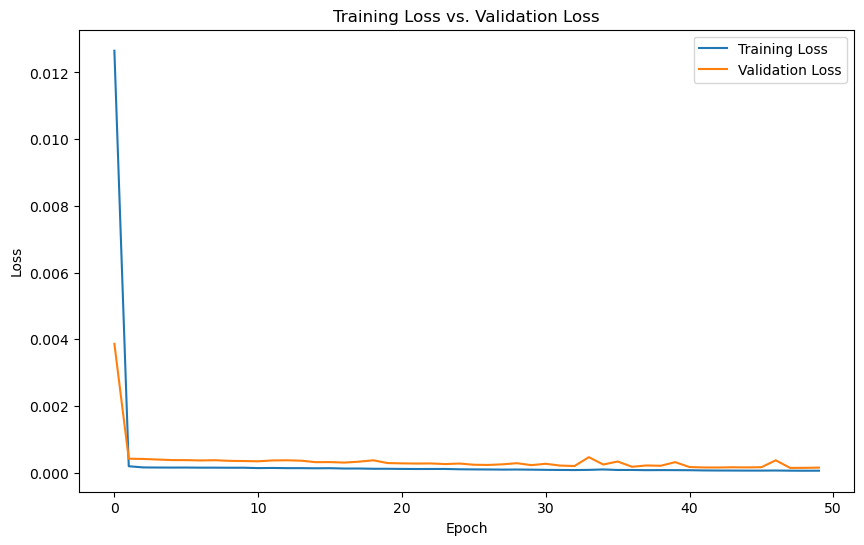

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train RMSE: 0.6361410035315102
Train MAE: 0.3565782863530828
Train MAPE: 0.7963097838577525
Test RMSE: 1.4445561615385116
Test MAE: 1.053526658010265
Test MAPE: 1.3233807577368102


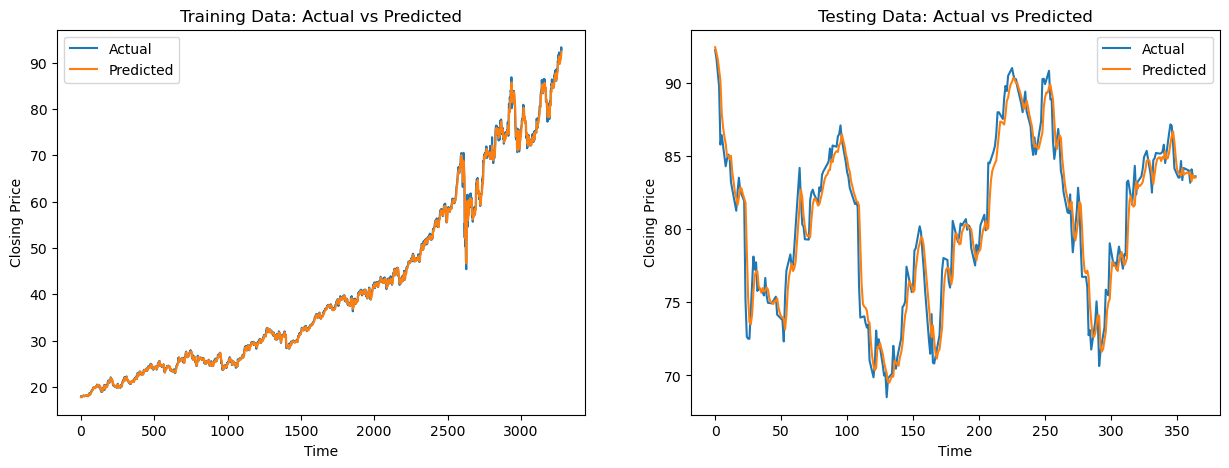

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

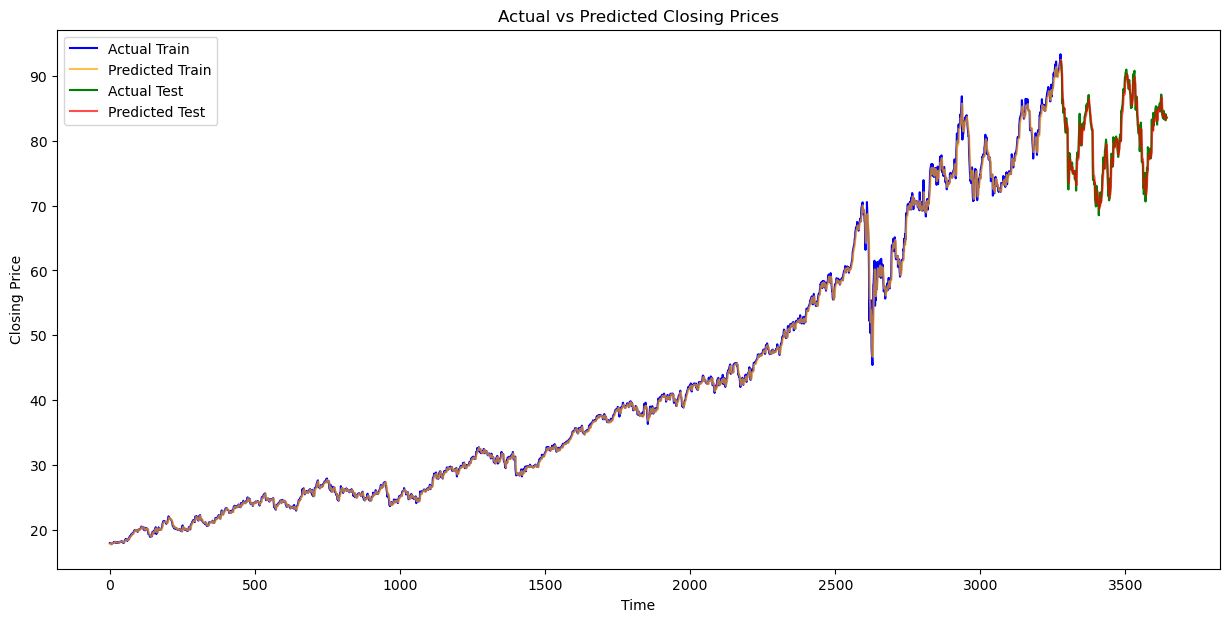

In [15]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# LSTM Model


In [16]:
import pandas as pd
import numpy as np

In [17]:
import yfinance as yf

ticker_symbol = 'NEE'

nee_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(nee_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2013-01-02  17.497499  17.642500  17.452499  17.629999  13.064059  8953200
2013-01-03  17.650000  17.707500  17.582500  17.632500  13.065911  4909200
2013-01-04  17.660000  17.737499  17.612499  17.719999  13.130745  3739200
2013-01-07  17.712500  17.735001  17.594999  17.637501  13.069619  5578400
2013-01-08  17.645000  17.825001  17.597500  17.825001  13.208551  7972400


In [18]:
nee_data.reset_index(inplace=True)

print(nee_data.head())

        Date       Open       High        Low      Close  Adj Close   Volume
0 2013-01-02  17.497499  17.642500  17.452499  17.629999  13.064059  8953200
1 2013-01-03  17.650000  17.707500  17.582500  17.632500  13.065911  4909200
2 2013-01-04  17.660000  17.737499  17.612499  17.719999  13.130745  3739200
3 2013-01-07  17.712500  17.735001  17.594999  17.637501  13.069619  5578400
4 2013-01-08  17.645000  17.825001  17.597500  17.825001  13.208551  7972400


In [19]:
nee_data['Date'] = pd.to_datetime(nee_data['Date'])
nee_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.497499,17.642500,17.452499,17.629999,13.064059,8953200
1,2013-01-03,17.650000,17.707500,17.582500,17.632500,13.065911,4909200
2,2013-01-04,17.660000,17.737499,17.612499,17.719999,13.130745,3739200
3,2013-01-07,17.712500,17.735001,17.594999,17.637501,13.069619,5578400
4,2013-01-08,17.645000,17.825001,17.597500,17.825001,13.208551,7972400
...,...,...,...,...,...,...,...
2513,2022-12-23,83.000000,84.269997,83.000000,84.169998,81.116180,3254700
2514,2022-12-27,84.099998,84.279999,83.470001,84.000000,80.952347,4726500
2515,2022-12-28,84.199997,84.540001,82.980003,83.160004,80.142830,3536400
2516,2022-12-29,83.730003,84.690002,83.489998,84.080002,81.029457,3378300


In [20]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
nee_merged = pd.merge(date_range_df, nee_data, on='Date', how='left')
nee_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,17.497499,17.642500,17.452499,17.629999,13.064059,8953200.0
2,2013-01-03,17.650000,17.707500,17.582500,17.632500,13.065911,4909200.0
3,2013-01-04,17.660000,17.737499,17.612499,17.719999,13.130745,3739200.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,84.199997,84.540001,82.980003,83.160004,80.142830,3536400.0
3649,2022-12-29,83.730003,84.690002,83.489998,84.080002,81.029457,3378300.0
3650,2022-12-30,83.949997,84.019997,82.480003,83.599998,80.566872,4266900.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    nee_merged[metric].interpolate(method='linear', inplace=True)

nee_merged.bfill(inplace=True)
nee_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,17.497499,17.642500,17.452499,17.629999,13.064059,8.953200e+06
1,2013-01-02,17.497499,17.642500,17.452499,17.629999,13.064059,8.953200e+06
2,2013-01-03,17.650000,17.707500,17.582500,17.632500,13.065911,4.909200e+06
3,2013-01-04,17.660000,17.737499,17.612499,17.719999,13.130745,3.739200e+06
4,2013-01-05,17.677500,17.736666,17.606666,17.692500,13.110370,4.352267e+06
...,...,...,...,...,...,...,...
3648,2022-12-28,84.199997,84.540001,82.980003,83.160004,80.142830,3.536400e+06
3649,2022-12-29,83.730003,84.690002,83.489998,84.080002,81.029457,3.378300e+06
3650,2022-12-30,83.949997,84.019997,82.480003,83.599998,80.566872,4.266900e+06
3651,2022-12-31,83.949997,84.019997,82.480003,83.599998,80.566872,4.266900e+06


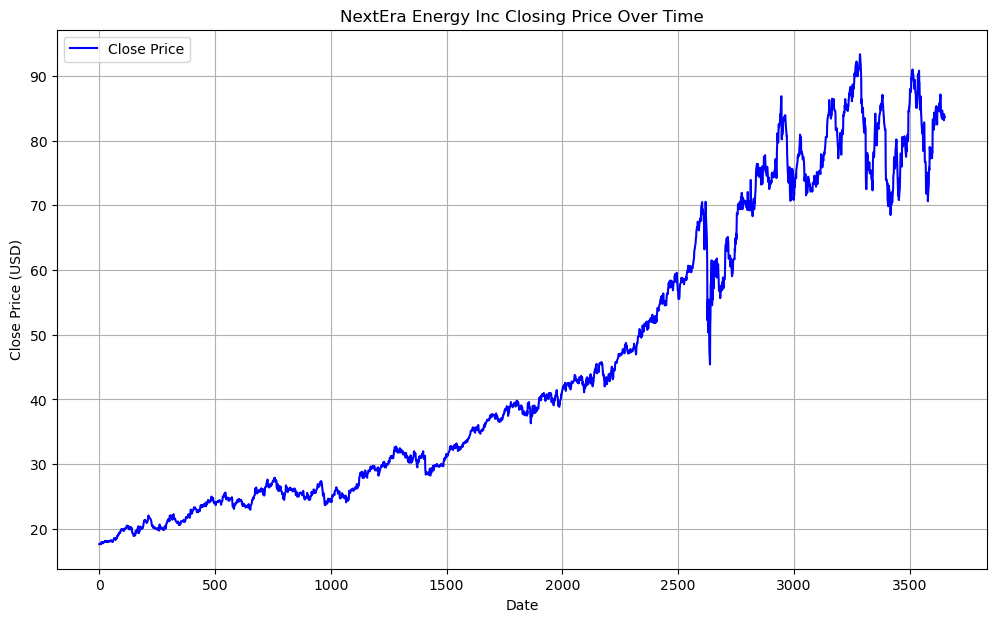

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(nee_merged['Close'], label='Close Price', color='blue')
plt.title('NextEra Energy Inc Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = nee_merged[['Close']].values

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 1)
(365, 10, 1)
(3278, 1)
(365, 1)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()

model.add(LSTM(units=64, activation='tanh', input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=False))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mean_absolute_error'])
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 3s - 72ms/step - loss: 0.0234 - mean_absolute_error: 0.0957 - val_loss: 8.3010e-04 - val_mean_absolute_error: 0.0232
Epoch 2/50
47/47 - 0s - 6ms/step - loss: 3.1437e-04 - mean_absolute_error: 0.0124 - val_loss: 6.7874e-04 - val_mean_absolute_error: 0.0207
Epoch 3/50
47/47 - 0s - 6ms/step - loss: 2.1667e-04 - mean_absolute_error: 0.0096 - val_loss: 5.8751e-04 - val_mean_absolute_error: 0.0193
Epoch 4/50
47/47 - 0s - 5ms/step - loss: 1.9672e-04 - mean_absolute_error: 0.0085 - val_loss: 5.9846e-04 - val_mean_absolute_error: 0.0195
Epoch 5/50
47/47 - 0s - 5ms/step - loss: 1.8327e-04 - mean_absolute_error: 0.0079 - val_loss: 4.6799e-04 - val_mean_absolute_error: 0.0174
Epoch 6/50
47/47 - 0s - 5ms/step - loss: 1.8156e-04 - mean_absolute_error: 0.0076 - val_loss: 4.4798e-04 - val_mean_absolute_error: 0.0170
Epoch 7/50
47/47 - 0s - 5ms/step - loss: 1.8101e-04 - mean_absolute_error: 0.0075 - val_loss: 5.4558e-04 - val_mean_absolute_error: 0.0185
Epoch 8/50
47/47 - 0s - 5ms/st

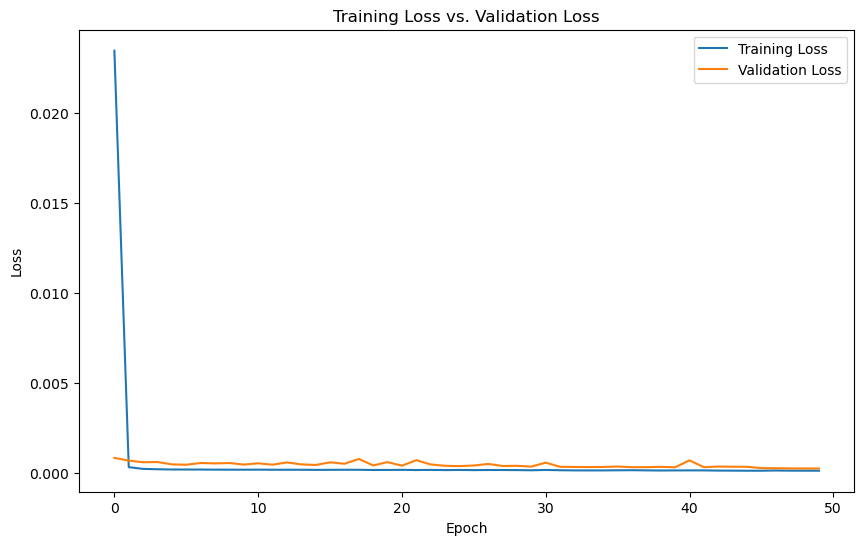

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train RMSE: 0.8281953379947506
Train MAE: 0.46947629979792865
Train MAPE: 1.0773264094428725
Test RMSE: 1.8858934613733915
Test MAE: 1.403951155431739
Test MAPE: 1.7713979427313724


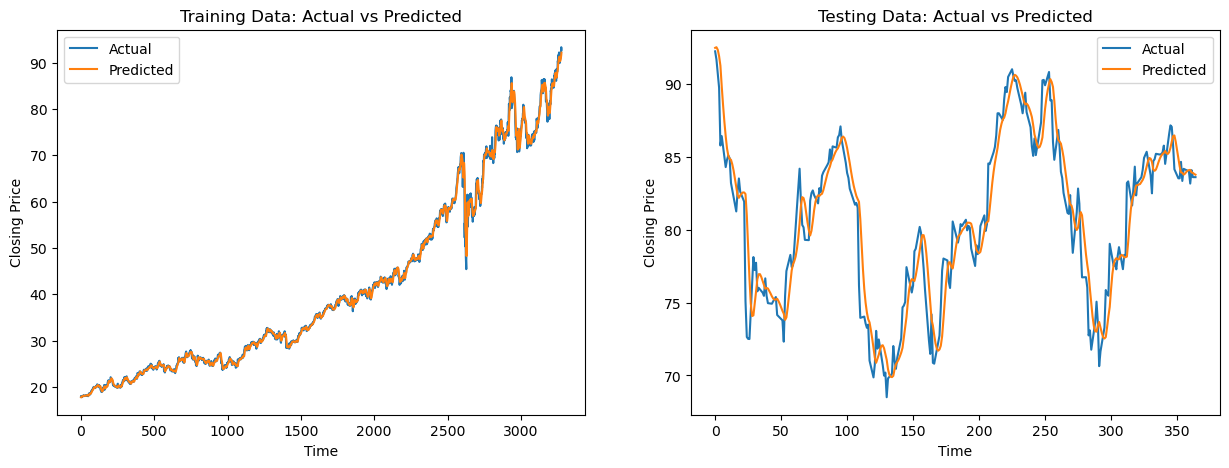

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

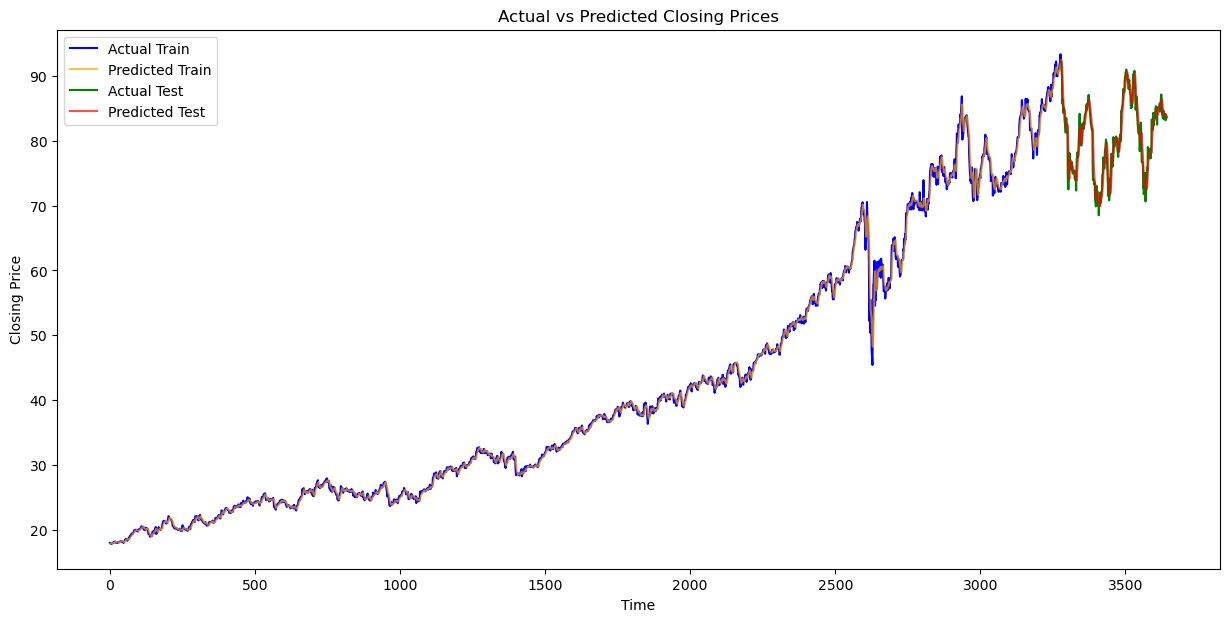

In [30]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# CNN-LSTM Model

In [31]:
import pandas as pd
import numpy as np

In [32]:
import yfinance as yf

ticker_symbol = 'NEE'

nee_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(nee_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2013-01-02  17.497499  17.642500  17.452499  17.629999  13.064059  8953200
2013-01-03  17.650000  17.707500  17.582500  17.632500  13.065911  4909200
2013-01-04  17.660000  17.737499  17.612499  17.719999  13.130745  3739200
2013-01-07  17.712500  17.735001  17.594999  17.637501  13.069619  5578400
2013-01-08  17.645000  17.825001  17.597500  17.825001  13.208551  7972400


In [33]:
nee_data.reset_index(inplace=True)

print(nee_data.head())

        Date       Open       High        Low      Close  Adj Close   Volume
0 2013-01-02  17.497499  17.642500  17.452499  17.629999  13.064059  8953200
1 2013-01-03  17.650000  17.707500  17.582500  17.632500  13.065911  4909200
2 2013-01-04  17.660000  17.737499  17.612499  17.719999  13.130745  3739200
3 2013-01-07  17.712500  17.735001  17.594999  17.637501  13.069619  5578400
4 2013-01-08  17.645000  17.825001  17.597500  17.825001  13.208551  7972400


In [34]:
nee_data['Date'] = pd.to_datetime(nee_data['Date'])
nee_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.497499,17.642500,17.452499,17.629999,13.064059,8953200
1,2013-01-03,17.650000,17.707500,17.582500,17.632500,13.065911,4909200
2,2013-01-04,17.660000,17.737499,17.612499,17.719999,13.130745,3739200
3,2013-01-07,17.712500,17.735001,17.594999,17.637501,13.069619,5578400
4,2013-01-08,17.645000,17.825001,17.597500,17.825001,13.208551,7972400
...,...,...,...,...,...,...,...
2513,2022-12-23,83.000000,84.269997,83.000000,84.169998,81.116180,3254700
2514,2022-12-27,84.099998,84.279999,83.470001,84.000000,80.952347,4726500
2515,2022-12-28,84.199997,84.540001,82.980003,83.160004,80.142830,3536400
2516,2022-12-29,83.730003,84.690002,83.489998,84.080002,81.029457,3378300


In [35]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
nee_merged = pd.merge(date_range_df, nee_data, on='Date', how='left')
nee_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,17.497499,17.642500,17.452499,17.629999,13.064059,8953200.0
2,2013-01-03,17.650000,17.707500,17.582500,17.632500,13.065911,4909200.0
3,2013-01-04,17.660000,17.737499,17.612499,17.719999,13.130745,3739200.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,84.199997,84.540001,82.980003,83.160004,80.142830,3536400.0
3649,2022-12-29,83.730003,84.690002,83.489998,84.080002,81.029457,3378300.0
3650,2022-12-30,83.949997,84.019997,82.480003,83.599998,80.566872,4266900.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    nee_merged[metric].interpolate(method='linear', inplace=True)

nee_merged.bfill(inplace=True)
nee_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,17.497499,17.642500,17.452499,17.629999,13.064059,8.953200e+06
1,2013-01-02,17.497499,17.642500,17.452499,17.629999,13.064059,8.953200e+06
2,2013-01-03,17.650000,17.707500,17.582500,17.632500,13.065911,4.909200e+06
3,2013-01-04,17.660000,17.737499,17.612499,17.719999,13.130745,3.739200e+06
4,2013-01-05,17.677500,17.736666,17.606666,17.692500,13.110370,4.352267e+06
...,...,...,...,...,...,...,...
3648,2022-12-28,84.199997,84.540001,82.980003,83.160004,80.142830,3.536400e+06
3649,2022-12-29,83.730003,84.690002,83.489998,84.080002,81.029457,3.378300e+06
3650,2022-12-30,83.949997,84.019997,82.480003,83.599998,80.566872,4.266900e+06
3651,2022-12-31,83.949997,84.019997,82.480003,83.599998,80.566872,4.266900e+06


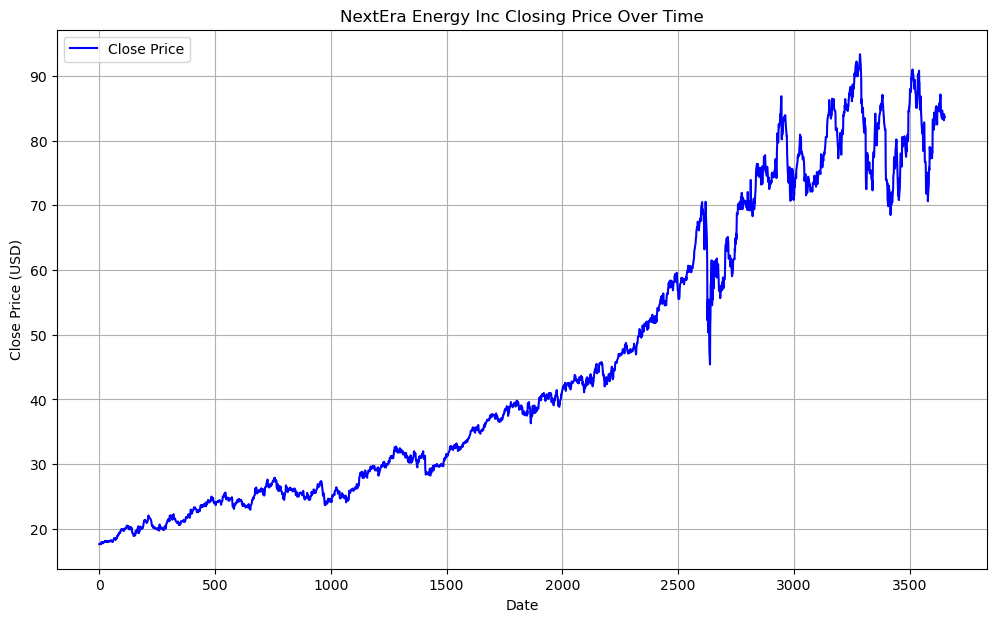

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(nee_merged['Close'], label='Close Price', color='blue')
plt.title('NextEra Energy Inc Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = nee_merged[['Close']].values

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 1)
(365, 10, 1)
(3278, 1)
(365, 1)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Bidirectional, TimeDistributed, Flatten

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), padding='same'))
model.add(MaxPooling1D(pool_size=1, padding='same'))

# model.add((Flatten()))

# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=1, padding='same'))
model.add(LSTM(units=64, return_sequences=False, activation='tanh'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])

# Model summary to see the architecture
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 10, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,025 (97.75 KB)

 Trainable params: 25,025 (97.75 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 3s - 72ms/step - loss: 0.0131 - mean_absolute_error: 0.0689 - val_loss: 3.7929e-04 - val_mean_absolute_error: 0.0160
Epoch 2/50
47/47 - 0s - 6ms/step - loss: 1.9490e-04 - mean_absolute_error: 0.0088 - val_loss: 3.6249e-04 - val_mean_absolute_error: 0.0153
Epoch 3/50
47/47 - 0s - 6ms/step - loss: 1.4359e-04 - mean_absolute_error: 0.0068 - val_loss: 4.0354e-04 - val_mean_absolute_error: 0.0161
Epoch 4/50
47/47 - 0s - 6ms/step - loss: 1.3951e-04 - mean_absolute_error: 0.0066 - val_loss: 4.3126e-04 - val_mean_absolute_error: 0.0167
Epoch 5/50
47/47 - 0s - 7ms/step - loss: 1.4200e-04 - mean_absolute_error: 0.0067 - val_loss: 3.4846e-04 - val_mean_absolute_error: 0.0150
Epoch 6/50
47/47 - 0s - 7ms/step - loss: 1.3504e-04 - mean_absolute_error: 0.0064 - val_loss: 4.1137e-04 - val_mean_absolute_error: 0.0163
Epoch 7/50
47/47 - 0s - 7ms/step - loss: 1.3792e-04 - mean_absolute_error: 0.0066 - val_loss: 3.3979e-04 - val_mean_absolute_error: 0.0149
Epoch 8/50
47/47 - 0s - 7ms/st

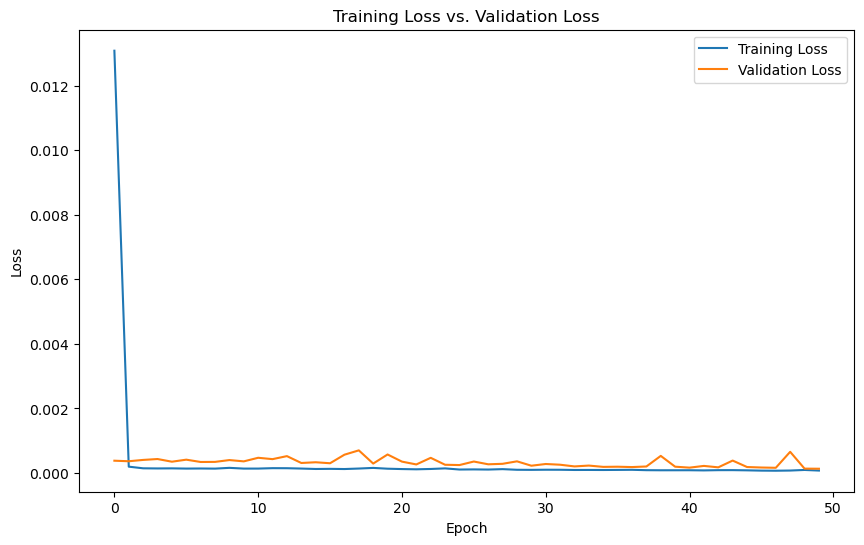

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train RMSE: 0.6351838819892563
Train MAE: 0.35146771675933797
Train MAPE: 0.8172077859124247
Test RMSE: 1.407644976088501
Test MAE: 1.002755068426263
Test MAPE: 1.265047915537949


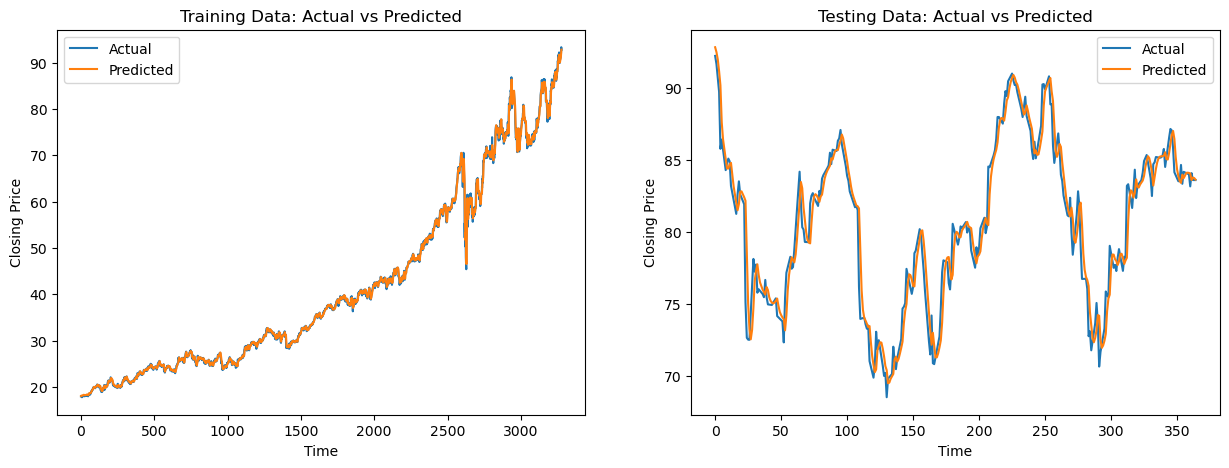

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

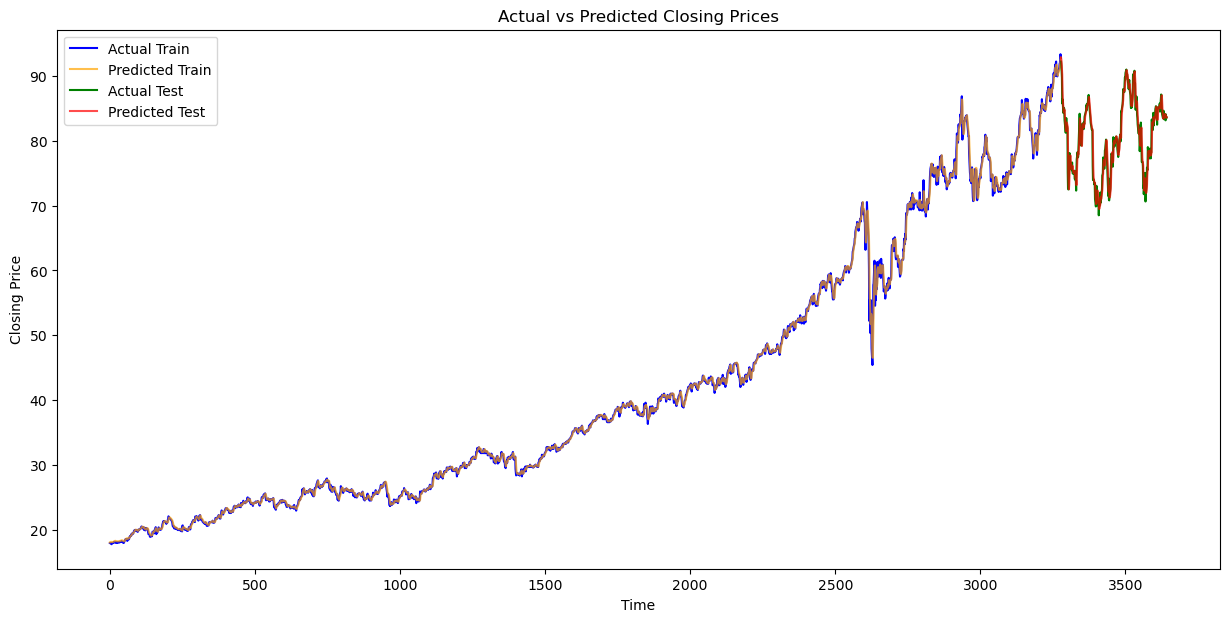

In [45]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()